# PRODUCT CATEGORY PREDICTION

### About The Dataset:~
This is a pre-crawled dataset, taken as subset of a bigger data set (more than 5.8 million products) that was created by extracting data from Flipkart.com, a leading Indian eCommerce store.


### References :~ 
dataset - https://docs.google.com/spreadsheets/d/1pLv0fNE4WHokpJHUIs-FTVnmI9STgog05e658qEON0I/edit?usp=sharing

Naive Bayes Classifiers- https://www.geeksforgeeks.org/naive-bayes-classifiers/

NB: https://www.youtube.com/watch?v=O2L2Uv9pdDA

### Assumptions:~
Only five product category data is considered from the total set.


### Objective:~

* We will pick a Pre-crawled dataset in CSV format and read this dataset into a dataframe using Pandas Python library.
* Perform data preparation ,cleaning and processing
* Perform some data visualization techniques using Matplotlib and Seaborn.
* Figuring out the primary category.
* Defining the model using MultinomialNB and the model is used to predict the product category using description.
* Accuracy of the model is measured.
* Further the accuracy of the model is improved.

In [1]:
pip install nltk

Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


#### Let's first import all the python libraries required-

In [1]:
import numpy as np 
import pandas as pd 
import re 
import nltk 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation 

#### To read the file, we can use the read_csv method from Pandas. Data from the file is read and stored in a DataFrame object, import_df.

In [2]:
import_df = pd.read_csv("flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")
import_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [3]:
import_df['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

#### In the 'product_category_tree', I have separated all the categories and figured out the primary category.Here, clothing,furniture etc are the primary categories which are stored again in 'product_category_tree' column 

In [4]:
import_df['product_category_tree'] = import_df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())
import_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,Baby Care,STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,Baby Care,STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,Baby Care,STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,Baby Care,STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


#### Listing top five categories

In [5]:
top_five_category = list(import_df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(5).index)
top_five_category

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive']

## Data Cleaning

#### Creating a new dataframe ,'processed_df' which contains top five categories and its corresponding description.

In [6]:
processed_df= import_df[import_df['product_category_tree'].isin(top_five_category)][['description','product_category_tree']]
processed_df

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


####  Creating another dataframe 'processed_df1'  which is same as 'processed_df' for data visualization.

In [7]:
processed_df1= import_df[import_df['product_category_tree'].isin(top_five_category)][['description','product_category_tree']]
processed_df1

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


#### Any data or information stored within a Python variable has a type. The type of data stored within a variable can be checked using the type function.

#### Here, the type of main data frame 'processed_df' and type of attribute 'description' is shown.

In [8]:
type(processed_df)

pandas.core.frame.DataFrame

In [9]:
type('description')

str

####  The Shape method is used to retrieve the number of rows and columns as a tuple in the data frame.

In [10]:
processed_df.shape

(13067, 2)

#### The columns property gets the list of columns within the specified data frame.

In [11]:
processed_df.columns

Index(['description', 'product_category_tree'], dtype='object')

#### The info method views some basic information about the data frame.

In [12]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13067 entries, 0 to 19962
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            13066 non-null  object
 1   product_category_tree  13067 non-null  object
dtypes: object(2)
memory usage: 306.3+ KB


#### The describe method can view the some statistical information like count, unique ,frequency ,top,mean,standard deviation, minimum/maximum values and number of non-empty values.

In [13]:
processed_df.describe()

,description,product_category_tree
count,13066,13067
unique,11174,5
top,TheLostPuppy Back Cover for Apple iPad Air (Mu...,Clothing
freq,92,6198


## Data Processing

#### 'preprocess_string' function cleans the input string  step by step in the below mentioned ways.
####  input:   str_arg --> Takes string to clean
####  output: cleaned_str --> returns back preprocessed string

In [14]:
def preprocess_string(str_arg):
    cleaned_str = re.sub('[^a-z\s]+' , ' ' , str_arg,flags = re.IGNORECASE)#every character except alphabets are replaced by a single space
    cleaned_str = re.sub('(\s+)' , ' ', cleaned_str)  #multiple spaces are replaced by single space
    cleaned_str = cleaned_str.lower()   #converting the resultant string to lower case
    
    return cleaned_str     #Returning the preprocessed string in tokenized form

#### apply() method takes a function as an input and apply this function to an entire dataframe.


#### Here, 'description' column of main dataframe i.e, 'processed_df' is converted to str type at first and then 'preprocess_string'  function is applied on it.

In [15]:
#cleaning strings
processed_df['description'] = processed_df['description'].astype('str').apply(preprocess_string) 
processed_df

,description,product_category_tree
0,key features of alisha solid women s cycling s...,Clothing
2,key features of aw bellies sandals wedges heel...,Footwear
3,key features of alisha solid women s cycling s...,Clothing
6,key features of alisha solid women s cycling s...,Clothing
8,key features of dilli bazaaar bellies corporat...,Footwear
...,...,...
19936,flipkart com buy purple women heels only for r...,Footwear
19941,flipkart com buy pinq chiq women heels only fo...,Footwear
19953,flipkart com buy la isla women heels only for ...,Footwear
19958,flipkart com buy we witches comfy hues women w...,Footwear


#### creating a list of unique product categories using unique() method.

In [16]:
category_list = list(processed_df['product_category_tree'].unique())
category_list

['Clothing', 'Footwear', 'Automotive', 'Mobiles & Accessories', 'Jewellery']

#### This is an important pre-processing step for the structured dataset in supervised learning.

#### LABEL ENCODING: It refers to converting the labels into numeric form so as to convert it into the machine-readable form. 

In [17]:
# Encoding the product category
label_encoder = preprocessing.LabelEncoder()
processed_df['product_category_tree'] = label_encoder.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree']

0        1
2        2
3        1
6        1
8        2
        ..
19936    2
19941    2
19953    2
19958    2
19962    2
Name: product_category_tree, Length: 13067, dtype: int32

## Data Visualization

#### Finding the count of rows that are null in each column.

In [18]:
import_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

#### A heat map (or heatmap) is a graphical representation of data where values are depicted by color. Heat maps make it easy to visualize complex data and understand it at a glance.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'uniq_id'),
  Text(1.5, 0, 'crawl_timestamp'),
  Text(2.5, 0, 'product_url'),
  Text(3.5, 0, 'product_name'),
  Text(4.5, 0, 'product_category_tree'),
  Text(5.5, 0, 'pid'),
  Text(6.5, 0, 'retail_price'),
  Text(7.5, 0, 'discounted_price'),
  Text(8.5, 0, 'image'),
  Text(9.5, 0, 'is_FK_Advantage_product'),
  Text(10.5, 0, 'description'),
  Text(11.5, 0, 'product_rating'),
  Text(12.5, 0, 'overall_rating'),
  Text(13.5, 0, 'brand'),
  Text(14.5, 0, 'product_specifications')])

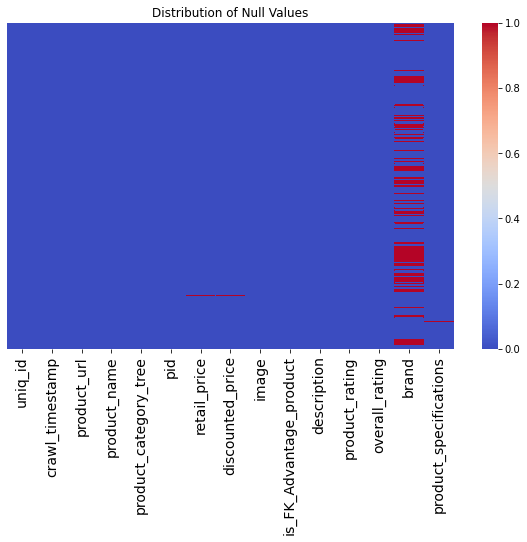

In [19]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Null Values")

sns.heatmap(import_df.isnull() , yticklabels=False , cmap='coolwarm' , cbar=True)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

###### Conclusion - Above heatmap shows that the brand column has maximum number of null values which is depicted by the bright color(red).

#### The Matplotlib barh() function plots horizontal bar plots.The bars are positioned at specific input values of ‘y’ with the given alignment. 

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

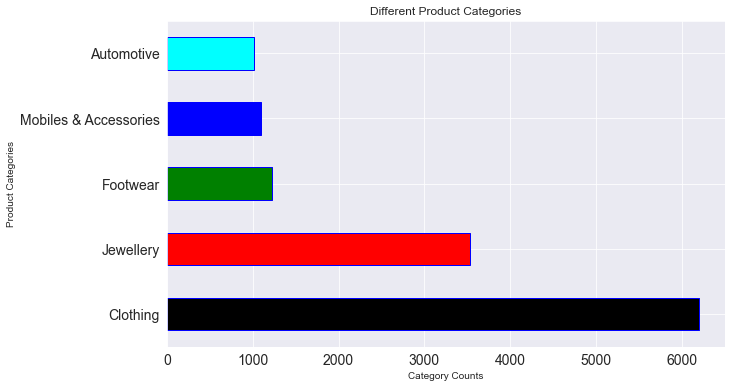

In [20]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

processed_df1['product_category_tree'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh',color=['black', 'red', 'green', 'blue', 'cyan'],edgecolor='blue')
plt.title('Different Product Categories')
plt.xlabel('Category Counts')
plt.ylabel('Product Categories')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

###### Conclusion - Above barh plot shows most of the customer prefer getting Clothes from Flipkart which is depicted by the longest bar(black) clothing

#### Making 'crawl_timestamp' column into a datetime type for workability.

In [21]:
import_df['crawl_timestamp']=pd.to_datetime(import_df['crawl_timestamp'])
import_df['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

#### Finding the month wise sale of  Flipkart poducts

In [22]:
import_df['Month']=import_df['crawl_timestamp'].apply(lambda x : x.month)
import_df['Month']

0         3
1         3
2         3
3         3
4         3
         ..
19995    12
19996    12
19997    12
19998    12
19999    12
Name: Month, Length: 20000, dtype: int64

#### A bar graph is a chart  that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '12')])

<Figure size 720x720 with 0 Axes>

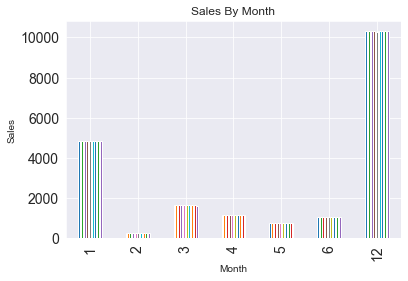

In [23]:
# Sales by month
plt.figure(figsize=(10,10))
import_df.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.title('Sales By Month')
plt.ylabel('Sales')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

###### Conclusion - Above bar chart shows that 12th Month of the year has maximum number of sales which is depicted by the longest bar 12

# Product Category Prediction

#### training set : a subset to train a model.
#### test set : a subset to test the trained model.

#### Here, the 'processed_df' dataset is sliced into training set and test set.
#### In the below code, splitting 'description' and 'product_category_tree' into training and testing sets.

In [24]:
X_train , X_test , y_train , y_test = train_test_split(processed_df['description'] , 
                                                       processed_df['product_category_tree'] ,test_size=0.2)

#### CountVectorizer() -> It gives the frequency of occurence of each words in its vocabulary.
#### stop_words = 'english' -> It helps to remove the list of words we donot want to use as feature.

#### Below code block, removes the stop words and converts the training data into vectorized form. 

In [25]:
vect = CountVectorizer(stop_words='english')
X_train_matrix = vect.fit_transform(X_train)

## The trained model is defined using Multinomial Naive Bayes

### Multinomial Naive Bayes:  Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.

### Since the given dataset is discrete and follows Multinomial distribution,so Multinomial NB classifier is used.

##### Below code block is for defining the model with vectorized training data and calculating the score

In [26]:
#Defining the model using multinomial
mnb = MultinomialNB()

#Fitting to multinomial NB model 
mnb.fit(X_train_matrix , y_train)

#checking how well the model explains the data it was trained with
print("Score For The Trained Model: ", mnb.score(X_train_matrix , y_train))

Score For The Trained Model:  0.992346694728786


#### Below code block converts the test data to vectorized form and calculates the score

In [27]:
X_test_matrix = vect.transform(X_test)
print("Score For The Test Data: ", mnb.score(X_test_matrix,y_test))

Score For The Test Data:  0.991583779648049


#### metric is used for classification performance.It is a module in sklearn.
#### Below code block, measures the accuracy of the model :~
#### 1. At first, the trained model is predicting the product category using predict method which takes test vectorized data(X_test_matrix) as an input.
#### 2. Then, the accuracy of the model is checked by comparing actual test product category and predicted product category. 

In [28]:
y_predicted = mnb.predict(X_test_matrix)
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test,y_predicted)*100)

Multinomial Naive Bayes model accuracy(in %): 99.1583779648049


In [29]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       1.00      1.00      1.00      1233
           2       0.97      0.99      0.98       254
           3       0.98      1.00      0.99       730
           4       1.00      0.93      0.97       199

    accuracy                           0.99      2614
   macro avg       0.99      0.98      0.99      2614
weighted avg       0.99      0.99      0.99      2614



###### Testing Block that is Predicting the product category:

In [30]:
label_encoder.inverse_transform(mnb.predict(vect.transform(['car'])))

array(['Automotive'], dtype=object)

### Q.How can the above  accuracy of the model be improved ?

###### Answer : Improving the  accuracy of  the model will give the precise results in various scenarios making such model more meaningful and relevant to enrich the customer experience when used in real-life.


###### Different ways to improve accuracy of the model  are as follows:
(i) Feed with More Training Data - More training data means adding variety of data that can cover wide-ranging scenario to avoid the biased decisions.Hence, the more data you feed it will definitely improve the accuracy of model.

(ii) Treat the Missing Values in Data - The missing and outlier values in the training data also reduce the accuracy of model or makes the model give a biased decision.It happens because usually we don’t analyze the action and relationship with other variables in the right way.

(iii) Finding the Right Variables or Features - Another way to improve the model accuracy is finding the right variables or features which is extracted as new information. Actually, features have a maximum impact on the outcome and is one of the key aspects.

(iv) Re-validation of Model - The accuracy of model can be also improved by re-validating the model at regular intervals. For this, it is important to score the model after using the new data on a daily, weekly or monthly basis as per the changes in the data.

(v) Ensemble Models Method - Ensemble models is the most common method that combines multiple models to improve accuracy using bagging and boosting. The Ensemble method can improve the performance of prediction.

### Q. What other algorithms can be tried to improve the accuracy of the model? 

#### Answer: Some algorithms are as follows:

(i) Algorithm Tuning - The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. To tune these parameters, we must have a good understanding of these meaning and their individual impact on model. we can repeat this process with a number of well performing models.


(ii) Multiple algorithms - Hitting at the right algorithm is the ideal approach to achieve higher accuracy.
This intuition comes with experience and incessant practice. Some algorithms are better suited to a particular type of data sets than others. Hence, we should apply all relevant models and check the performance.

## Conclusion

After predicting the product category on the given flipkart dataset,we can conclude that:-

* Multinomial Naive Bayes classifier works well for this dataset with an accuracy of above 99%.This is a business ready model to deploy.